In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

Using TensorFlow backend.


In [8]:
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 20 # repeat 100 times

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

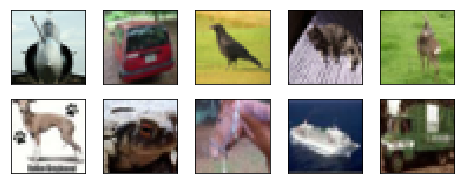

In [10]:
# Print figure with 10 random images from each 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    plt.imshow(im)
plt.show()

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [12]:
model = Sequential()
model.add(Conv2D(6, (5, 5), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr = 0.001, momentum=0.9)

# Train model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
 
# Fit model
cnn = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                validation_data=(x_test,y_test),shuffle=True)
    
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 32, 32)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 6, 32, 32)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 16, 16)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 8, 8)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model-Cifa10-CNN_10.h5")
print("Saved model to disk")

Saved model to disk


######  Visualize convolution result

(3, 32, 32)


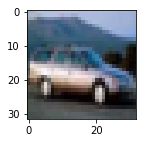

In [14]:
#An image from training set for visualization
fig = plt.figure(figsize=(2,2))
input_image=x_train[4,:,:,:]
print(input_image.shape)
im_image = np.transpose(input_image[::],(1,2,0))
plt.imshow(im_image)
plt.show()

1st Conv2d Layer


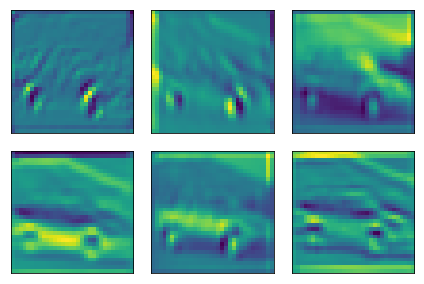

In [22]:
#1st convolution output
y = np.expand_dims(input_image, axis=0) #To Match the dimension
output_1stConv = K.function([model.layers[0].get_input_at(0)],
                                  [model.layers[0].get_output_at(0)])
layer_output_1stConv = output_1stConv([y])[0]

im=np.rollaxis(np.rollaxis(layer_output_1stConv,3,1),3,1)
print('1st Conv2d Layer')
fig = plt.figure(figsize=(6,6))
for i in range(6):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(im[0,:,:,i],interpolation='nearest')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

1st Activation layer


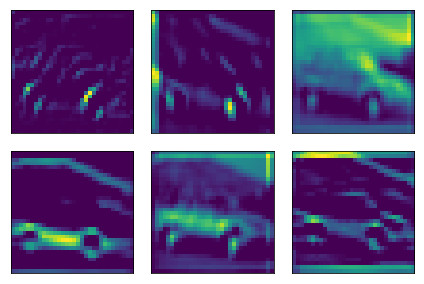

In [23]:
#1st Activation output
output_1stRelu = K.function([model.layers[0].get_input_at(0)],
                                  [model.layers[1].get_output_at(0)])
layer_output_1stRelu = output_1stRelu([y])[0]
im=np.rollaxis(np.rollaxis(layer_output_1stRelu,3,1),3,1)
fig = plt.figure(figsize=(6,6))
print('1st Activation layer')
for i in range(6):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(im[0,:,:,i],interpolation='nearest')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

1st MaxPooling output


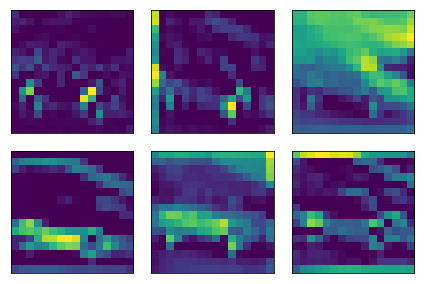

In [24]:
#1st MaxPooling output
output_1stPool = K.function([model.layers[0].get_input_at(0)],
                                  [model.layers[2].get_output_at(0)])
layer_output_1stPool= output_1stPool([y])[0]
im=np.rollaxis(np.rollaxis(layer_output_1stPool,3,1),3,1)
fig = plt.figure(figsize=(6,6))
print('1st MaxPooling output')
for i in range(6):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(im[0,:,:,i],interpolation='nearest')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

2nd convolution output


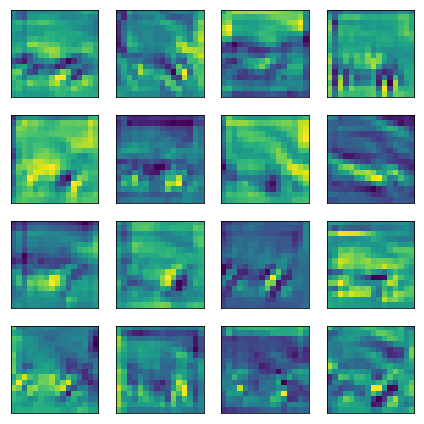

In [25]:
#2nd convolution output
output_2ndConv = K.function([model.layers[0].get_input_at(0)],
                                  [model.layers[3].get_output_at(0)])
layer_output_2ndConv = output_2ndConv([y])[0]
im=np.rollaxis(np.rollaxis(layer_output_2ndConv,3,1),3,1)
fig = plt.figure(figsize=(6,6))
print('2nd convolution output')
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(im[0,:,:,i],interpolation='nearest')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

2nd Activation output


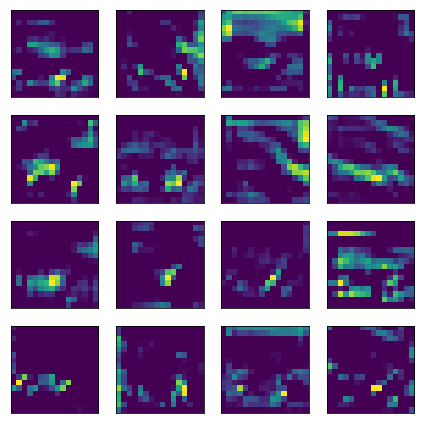

In [26]:
#2nd Activation output
output_2ndRelu = K.function([model.layers[0].get_input_at(0)],
                                  [model.layers[4].get_output_at(0)])
layer_output_2ndRelu = output_2ndRelu([y])[0]
im=np.rollaxis(np.rollaxis(layer_output_2ndRelu,3,1),3,1)
fig = plt.figure(figsize=(6,6))
print('2nd Activation output')
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(im[0,:,:,i],interpolation='nearest')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

2nd MaxPooling output


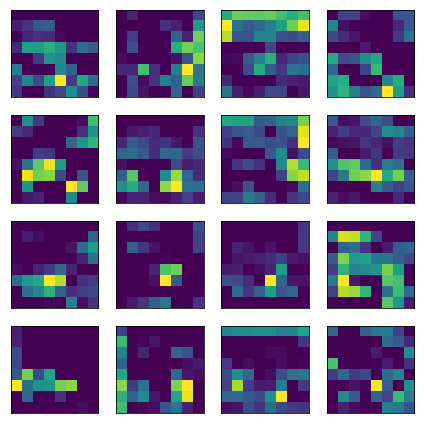

In [27]:
#2nd MaxPooling output
output_2ndPool = K.function([model.layers[0].get_input_at(0)],
                                  [model.layers[5].get_output_at(0)])
layer_output_2ndPool = output_2ndPool([y])[0]
im=np.rollaxis(np.rollaxis(layer_output_2ndPool,3,1),3,1)
fig = plt.figure(figsize=(6,6))
print('2nd MaxPooling output')
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(im[0,:,:,i],interpolation='nearest')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

###### Trained Weights of Convolutional Layer

Trained Weights of 1st Convolutional Layer


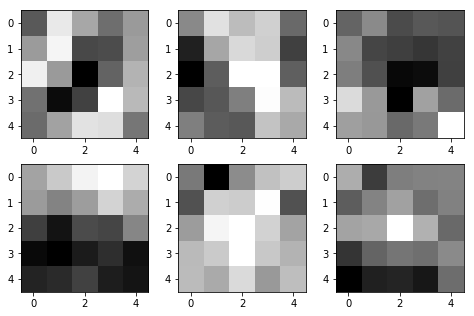

In [28]:
x1w = model.layers[0].get_weights()[0][:,:,0,:]
fig=plt.figure(figsize=(8,8))
print('Trained Weights of 1st Convolutional Layer')
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.imshow(x1w[:,:,i-1],interpolation="nearest",cmap="gray")
plt.show()

Trained Weights of 2nd Convolutional Layer


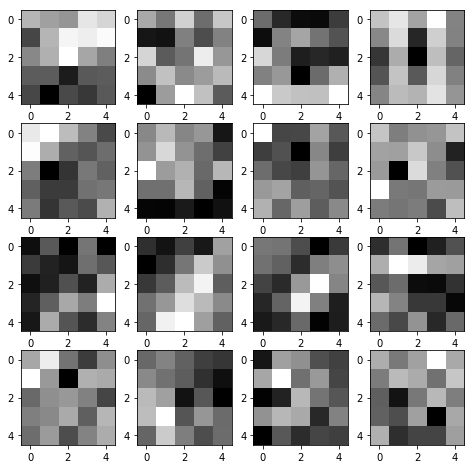

In [29]:
x2w = model.layers[3].get_weights()[0][:,:,0,:]
fig=plt.figure(figsize=(8,8))
print('Trained Weights of 2nd Convolutional Layer')
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(x2w[:,:,i-1],interpolation="nearest",cmap="gray")
plt.show()

(3, 32, 32)


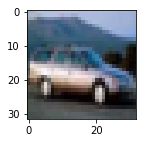

(1, 3, 32, 32)


In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(figsize=(2,2))
input_image=x_train[4,:,:,:]
print(input_image.shape)
im_image = np.transpose(input_image[::],(1,2,0))
plt.imshow(im_image)
plt.show()
m=x_train[4,:,:,:]
y = np.expand_dims(m, axis=0)
print(y.shape)

In [31]:
convout1_f = K.function(model.inputs, [model.layers[0].output])
c1 = convout1_f([y])
print(len(c1))
c1 = np.squeeze(c1)
print("C1 shape : ", c1.shape)

1
C1 shape :  (6, 32, 32)


In [32]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)
    plt.show()

In [33]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic


/Users/sagarmagar/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:860: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


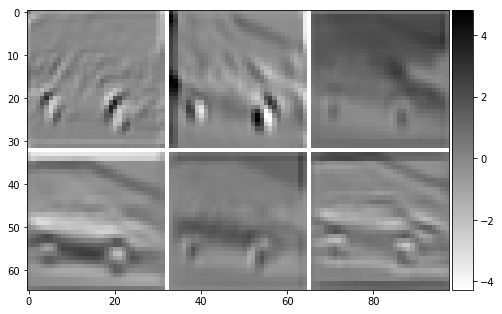

In [34]:
convout1_f = K.function(model.inputs, [model.layers[0].output])
c1 = convout1_f([y])
c1 = np.squeeze(c1)
# Visualize convolution result (before activation)
plt.figure(figsize=(8, 8))
nice_imshow(plt.gca(), make_mosaic(c1, 2, 3), cmap=cm.binary)

C1 shape :  (6, 32, 32)


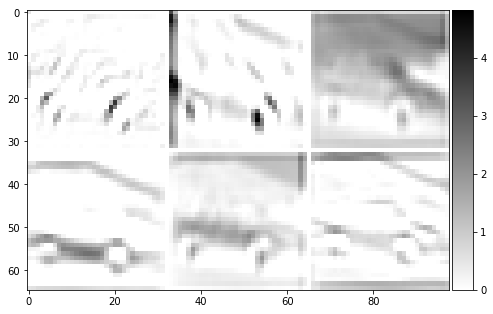

In [35]:
convout1_f = K.function(model.inputs, [model.layers[1].output])
c1 = convout1_f([y])
c1 = np.squeeze(c1)
print("C1 shape : ", c1.shape)
# Visualize convolution result (after activation)
plt.figure(figsize=(8, 8))
nice_imshow(plt.gca(), make_mosaic(c1, 2, 3), cmap=cm.binary)

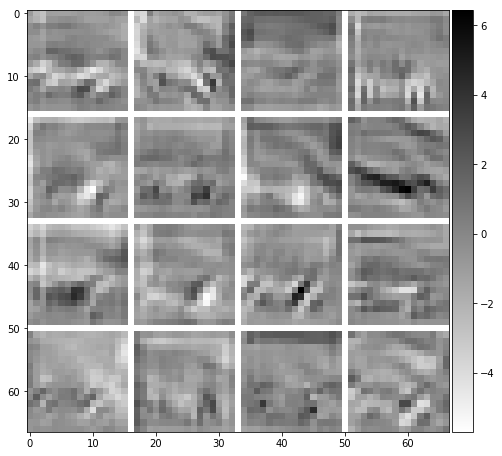

In [36]:
convout1_f = K.function(model.inputs, [model.layers[3].output])
c1 = convout1_f([y])
c1 = np.squeeze(c1)
# Visualize convolution result (before activation)
plt.figure(figsize=(8, 8))
nice_imshow(plt.gca(), make_mosaic(c1, 4, 4), cmap=cm.binary)

C1 shape :  (16, 16, 16)


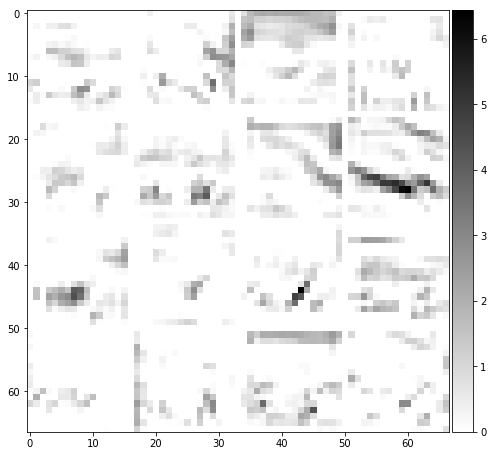

In [37]:
convout1_f = K.function(model.inputs, [model.layers[4].output])
c1 = convout1_f([y])
c1 = np.squeeze(c1)
print("C1 shape : ", c1.shape)
# Visualize convolution result (after activation)
plt.figure(figsize=(8, 8))
nice_imshow(plt.gca(), make_mosaic(c1, 4, 4), cmap=cm.binary)